<a href="https://colab.research.google.com/github/sket12/python-notebook/blob/master/Seconde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre et calculs


## Manipuler les nombres réels

### Déterminer par balayayge un encadrement de $ \sqrt{2}$  d'amplitude inférieure ou  égale à  $10^{-n}$

On commence par s'intérésser à la définition de  $\sqrt{2}$ , on sait que c'est la solution de $x^2=2$ ce qui est équivalent à dire que c'est la solution de $x^2-2=0$. 

On peut alors balayer les valeurs de $x^2-2$  pour $x$ variant entre deux valeurs avec un pas donné et  adaptable pour trouver "0"

Une remarque simple pour démarrer est que  si $x=0$ alors $x^2-2=-2$ et si $x=3$ alors $x^2-2=7$ et donc une solution possible de $x^2-2=0$ est pour une valeur de $x$ entre les deux.

On commence par calculer les valeurs de $x^2-2=7$ pour "x" variant entre 0 et 3 pour un "pas donné

In [0]:
def valeurs_x_y(pas):#calcul deux listes de valeurs contenant les abscissses et les ordonnées
    x=0
    list_valeur_x=[]#liste des abscisses
    list_valeur_y=[]#liste des ordonnées
    while x<=3:#boucle de parcours en avançant sur "x" par l'ajout du pas
        valeur_x,valeur_y=x,x**2-2# affecte les valeurs dans les variables
        list_valeur_x.append(valeur_x)#ajoute l'abscisse à la suite des abscisses
        list_valeur_y.append(valeur_y)#ajoute l'ordonnée à la suite des ordonnée
        x=x+pas
    return list_valeur_x,list_valeur_y# renvoie les listes dans un tuple

Puis on fait fonctionner le module pour obrenir les valeurs des abscisses et des ordonnées.

In [0]:
valeurs_x_y(1)#là le pas est de 1

([0, 1, 2, 3], [-2, -1, 2, 7])

Et donc on obtient deux listes , une qui contient les abscisses et l'autre les ordonnées. Mais c'est pas forcément simple à lire .. Surtout si le pas est petit

On peut obtenir un graphique de ces valeurs  pour cela on utilise la bibliothèque "matplotlib" et on va chercher les valeurs dans le module "valeurs_x_y"

In [0]:
import matplotlib.pyplot as plt#c'est la biblio des graphiques que l'on décide d'appeler plt
def tracer(pas):
    plt.axis([0.0, 3.0, -2.0, 7.0])#là on définit xmin,xmax,ymin,ymax pour le graphique
    plt.grid(True)#on construit la grille
    plt.plot((valeurs_x_y(pas))[0],(valeurs_x_y(pas))[1])#là on récupère les tuples  de valeurs_x_y
    plt.ylabel('Ordonnées')
    plt.xlabel('Abscisses')
    plt.show()#c'est lméthode de matplotlib pour dessiner

On trace alors avec le même pas 

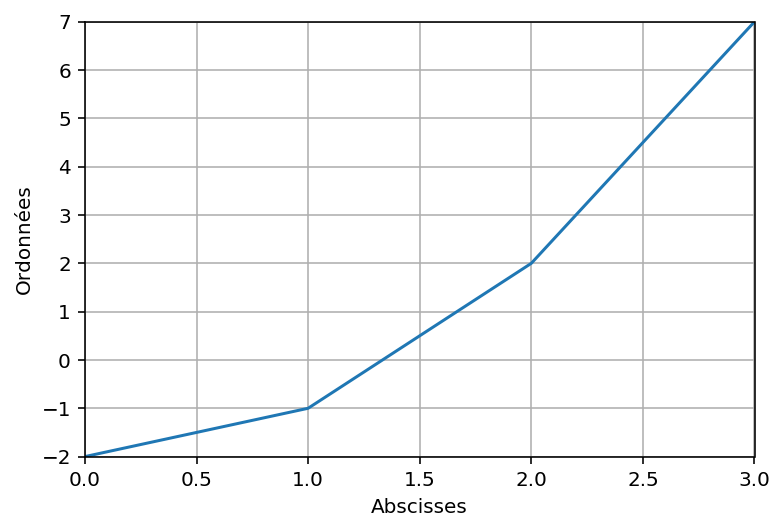

In [0]:
tracer(1)#trace avec les valeurs calculées pour un pas donné

Suer ce graphique on peut se rendre compte que l'équation $x^2-2=0$ a bien une solution et de sa position sur l'axe des abscisses.

Mais on peut être plus précis , changeant le pas .. il suffit de relancer les modules "tracer(pas)" et "valeurs_x_y(pas)" avec des valeurs de pas différents. Par exemple :

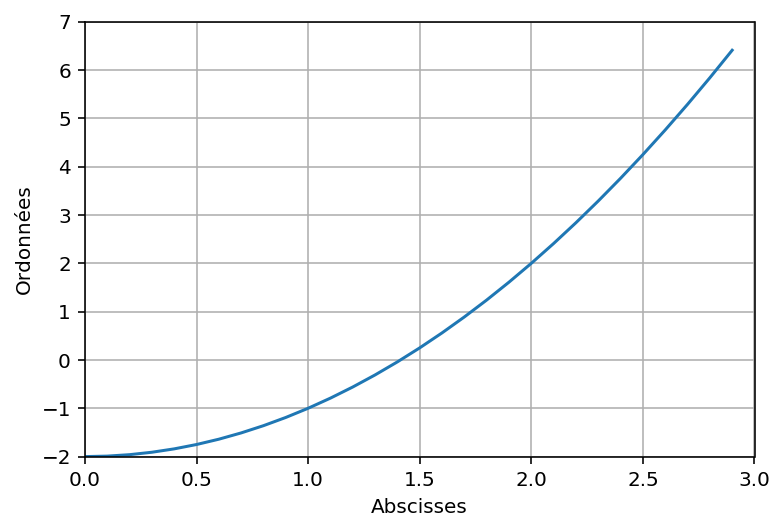

In [0]:
tracer(0.1)#ici le pas est de 0,1

On voit bien que la solution est entre 1 et 2..

Le problème c'est que l'on a  pas beaucoup d'information supplémentaires par le graphique cela vient du fait que les valeurs "max" et "min" de "x" et "y" ne sont pas optimisés à cette échelle.
On va donc récrire les modules "valeurs_x_y" et "tracer" en tenant compte de ce problème.

In [0]:
#C'est la même que la précédente mais on a ajouté xmin,xmax,ymin,ymax
def valeurs_x_y_2(pas,xmin,xmax,ymin,ymax):
    x=xmin
    list_valeur_x=[x] ;list_valeur_y=[x**2-2] #Initialisation des listes de coordonnées
    
    # Boucle de calcul des coordonnées
    while x<=xmax:
        x=x+pas
        list_valeur_x.append(x)
        list_valeur_y.append(x**2-2)
        
    return list_valeur_x,list_valeur_y # On retourne deux listes ( 0 et 1 ) avec les coordonnées

In [0]:
import matplotlib.pyplot as plt
def tracer_2(pas,xmin,xmax,ymin,ymax):
    plt.axis([xmin, xmax,ymin,ymax])
    plt.grid(True)
    plt.plot((valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[0],(valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[1])
    plt.ylabel('Ordonnées')
    plt.xlabel('Abscisses')
    plt.show()

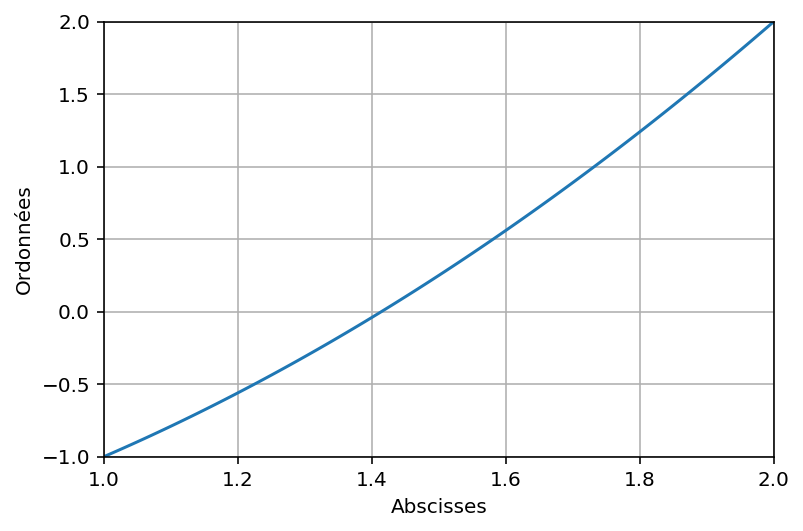

In [0]:
tracer_2(0.01,1,2,-1,2)#ici le pas c'est 0,01 xmin=1,xmax=2, ymin=-1,ymax=2

     On peut continuer en faisant des observations sur le graphique et en lançant à nouveau les modules.

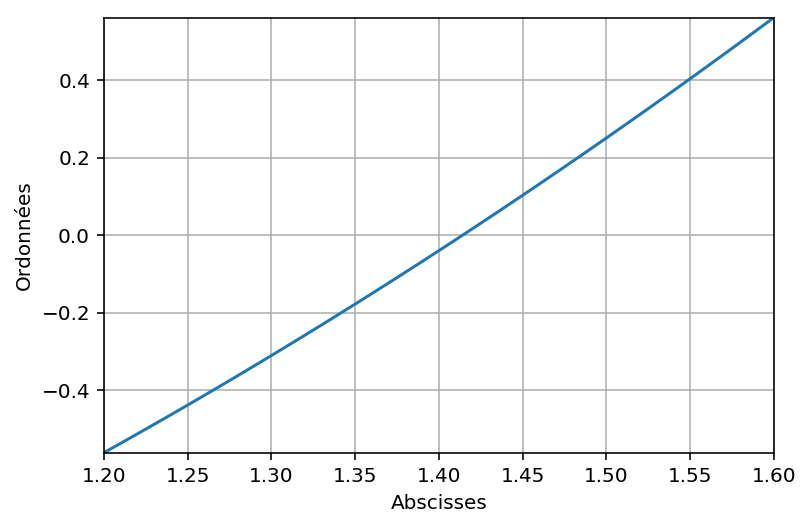

In [0]:
tracer_2(0.01,1.2,1.6,1.2*1.2-2,1.6*1.6-2)

    On peut recommencer... 

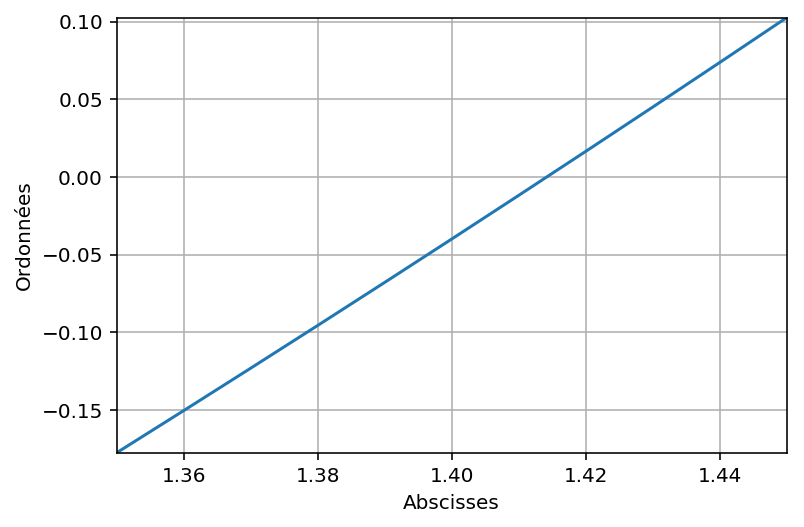

In [0]:
tracer_2(0.01,1.35,1.45,1.35*1.35-2,1.45*1.45-2)

   Pour se simplifier le travail on peut poser une fonction égale à $x^2-2$ 

In [0]:
def f(x):
    return x**2-2

Puis on rapelle la fonction "tracer_2" en utilisant cette fonction.

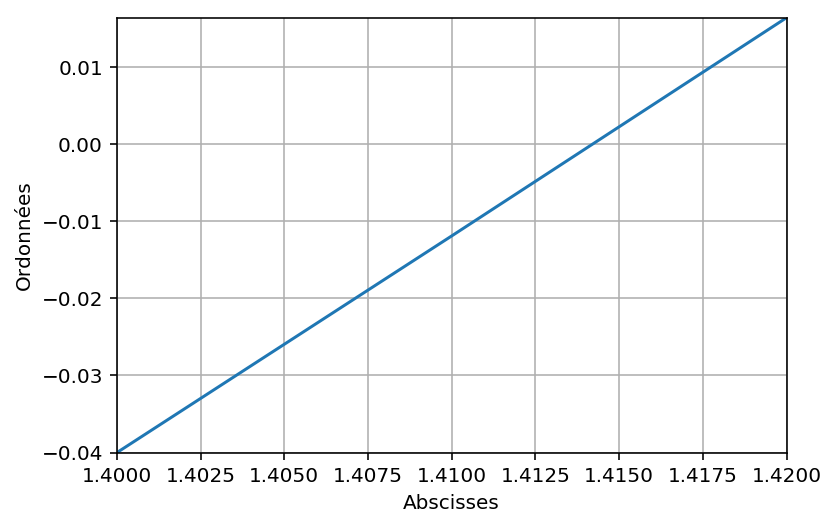

In [0]:
tracer_2(0.01,1.4,1.42,f(1.4),f(1.42))

On poursuit ..Mais au vue des infos portée sur les abscisses , on augmente le pas ..

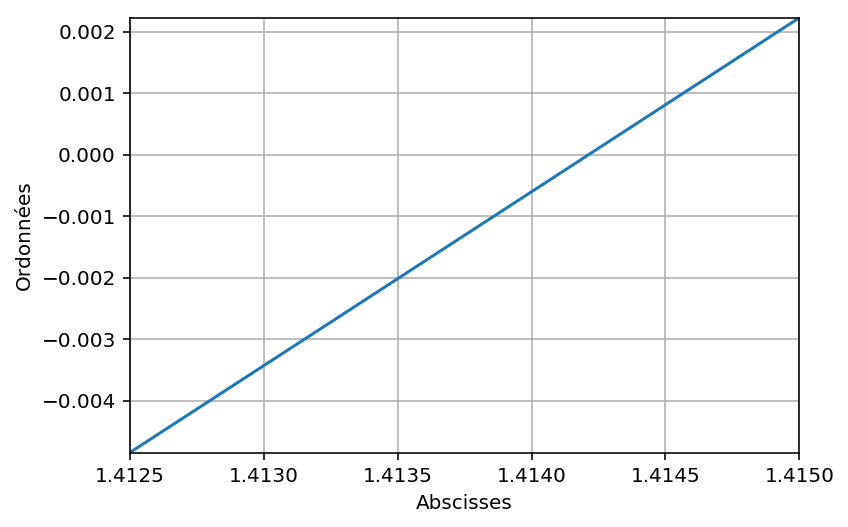

In [0]:
tracer_2(0.0001,1.4125,1.4150,f(1.4125),f(1.4150))

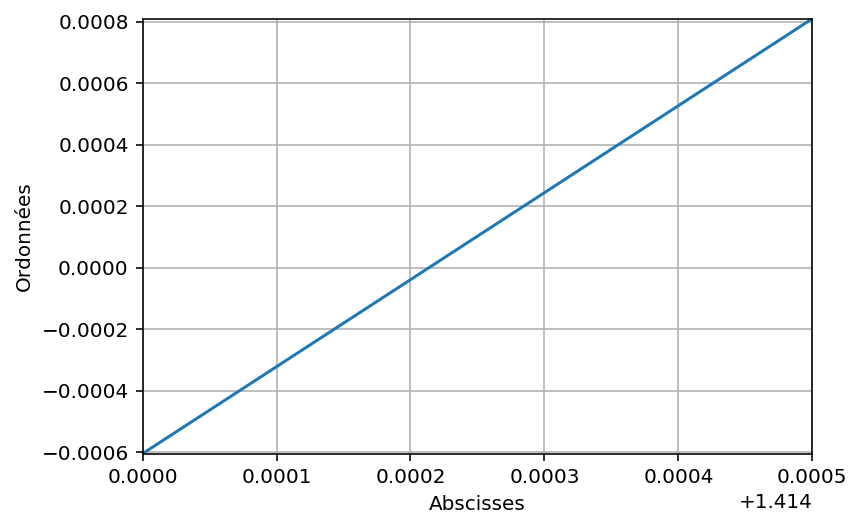

In [0]:
tracer_2(0.0001,1.4140,1.4145,f(1.4140),f(1.4145))

On peut alors modifier le calcul des valeurs pour que les abscisses et les ordonnées soient cote à cote dans l'affichage.
Pour cela on modifie valeurs_x_y_2 en changeant de nom.

In [0]:
def valeurs_x_y_3(pas,xmin,xmax,ymin,ymax):
    x=xmin
    list_valeur_x_y=[]
    while x<=xmax:
        valeur_x_y=x,f(x)#c'est la même formule mais en utilisant la fonction 
        list_valeur_x_y.append(valeur_x_y)# la liste contien x et f(x)
        x=x+pas
    return list_valeur_x_y

In [0]:
valeurs_x_y_3(0.0001,1.4140,1.4145,f(1.4140),f(1.4145))

[(1.414, -0.000604000000000271),
 (1.4141, -0.00032119000000019327),
 (1.4142, -3.836000000023709e-05),
 (1.4143, 0.00024448999999959753),
 (1.4143999999999999, 0.0005273599999995326),
 (1.4144999999999999, 0.0008102499999997903)]

Et on lit que  $f(x)=x^2-2=0$ pour $x$ entre 1,4142 et 1,4143

On peut enfin aborder le problème autrement. 

Et se demander si on peut atteindre une valeur approchée de  $\sqrt{2}$ pour cela on va évaluer $f(x)=x^2-2$ et chercher à savoir si cette quantité change de signes lorsque $x$ parcourt un intervalle donné avec un pas de $10^{-n}$ pour un "n" donné. 



In [0]:
def précision(n,xmin,xmax):# n est la puissance négatve de la précision
    x=xmin
    
    #boucle qui parcourt k'intervalle jusqu'à ce qu'à un changement de signe
    while x<xmax and f(x)*f(x+pow(10,-n))>0:
        x=x+pow(10,-n)
    if x>=xmax:
        reponse="pas de solution dans cet intervalle"
    if x<xmax:
        reponse=x,x+pow(10,-n) # La réponse est deux valeurs qui encadre la réponse 
    return reponse

In [0]:
précision(4,1,3)#ici 6 indique la puissance négative de 10, qui définit la précision

(1.4141999999999544, 1.4142999999999544)

## Utiliser les notions de multiple , diviseur et de nombre premier

### 1°) Déterminer si un entier a et multiple d'un entier b

    On se donne donc deux entiers "a" et "b" et on cherche à savoir si "a" est un multiple de "b"        
    Or c'est le cas il existe un entier "k" tel que a=kxb. 

    Il y a plusiers manières de faire.
    
    La première consiste à déterminer tous les multiples de b en faisant apparaître la table de multiplication de  "b" et à chercher à savoir si "a" est dedans...
    Mais la liste des multiples de "b" est infini ce qui n'est pas pratique  à gérer avec un ordinateur.
    
    Par contre si a est multiple de "b" il est équivalent de dire que "b" est un diviseur de "a" . 
    
    Et la liste des diviseurs , elle , elle est finie..

In [0]:
def multiple(a,b):#défini la liste des diviseurs et vérifie que b est dans cette liste
    reponse=""
    Liste_div_a = []  # Liste_div est une liste qui contient les diviseurs de "a"
    candidat = 1  # candidat passe en revu tous les nombres entiers  inférieurs à "a" en commençant par "1"
    while candidat <= a:  # dans cette boucle on ne retient des candidat que  ceux qui sont des diviseurs
        if a % candidat == 0:  #calcul le reste de la divison de "n" par "candidat"
            Liste_div_a.append(candidat)  # l'ajoute à la liste des diviseurs
        candidat = candidat + 1
    if b in Liste_div_a:#on teste si b est dans la liste des diviseurs de a
        reponse="oui s'en est un"
    else:
        reponse=" et non.."
    return b,Liste_div_a,reponse #on affiche "b" , la liste des diviseurs de "a" et la réponse 

In [0]:
multiple(156,5)# lance la procédure prépcédente et doinc renvoie la liste des divisersu et la réponse

(5, [1, 2, 3, 4, 6, 12, 13, 26, 39, 52, 78, 156], ' et non..')

### 2°)Déterminer le plus grand multiple de "a" inférieur ou égal à b.

    Il suffit de parcourir les multiples de "a" tant qu'on ne dépasse pas "b" ou que l'on est  égal à "b"

In [0]:
def plus_grand_mult(a,b):
    k=0
    mult_a=k*a#En fait "0" est multiple de tous les nombres
    list_mult_a=[]# c'est la liste des multiples
    while mult_a<=b:#on parcourt la liste tant que le multiple de a est plus petit ou égal à "b"
        list_mult_a.append(mult_a)#on construit la liste de smultiples
        k=k+1
        mult_a=k*a#calcul le multiple suivant
    if b in list_mult_a:
        reponse="il est dans la liste"
    else:
        reponse="il n'y est pas",
    return b,list_mult_a[len(list_mult_a)-1],list_mult_a,reponse#on renvoie b, le dernier élément de la liste la liste des multiples et dit si b est dans la liste

In [0]:
plus_grand_mult(5,21)# on cherche à connaître le plus grand multiple de 3 inférieur à 21 et savoir si c'est 21

(21, 20, [0, 5, 10, 15, 20], ("il n'y est pas",))

### 3°) Déterminer si un nombre est premier

    Pour cela on va commencer par contruire un module qui calcule la liste des diviseurs d'un entier. 
    
    Puis dans un second module on comparera cette liste à la liste qui contient que " 1" et l'entier lui même car si elles sont identiques le nombre est premier.  

In [0]:
def div(n):
    Liste_div = []  # Liste_div est une liste qui contient les diviseurs de "n"
    candidat = 1  # candidat passe en revu les nombres inférieurs à "n"
    while candidat <= n:  # dans cette boucle on ne retient des candidat que  ceux qui sont des diviseurs
        if n % candidat == 0:  #calcul le reste de la divison de "n" par "candidat"
            Liste_div.append(candidat)  # l'ajoute à la liste des diviseurs
        candidat = candidat + 1
    return Liste_div

In [0]:
def premier_ou_pas(N):# détermine si un nombre "N" et pemier ou pas en comparant sa liste de diviseur à la litse qui ne contient que 1 et lui même
    if div(N)==[1,N]:
        reponse="premier"
    else:
        reponse="pas_premier"
    return (reponse,div(N))# renvoie un tuple qui contient la réponse et la liste des diviseurs

In [1]:
premier_ou_pas(123)

NameError: ignored

## Utiliser le calcul littéral


### Déterminer la remière puissance d'un nombre donné supérieure ou inférieure à une valeur donnée

    On considère un nombre positif "A" et une valeur "v" données. On va augmenter 
    la puissance de "A" jusqu'à dépasser "v".  

In [0]:
def puiss_inf_sup_val(A,v):#détermine la liste des puissances de A , et la première puissance inférieur et supérieure à "v"
    n=0
    list_puiss=[]#initialise la liste des puissances
    puiss_A=A**n#calcul de la puissance de A
    while puiss_A<=v:#Boucle qui s'arête des que la puissance de "A" dépasse "v"
        list_puiss.append(puiss_A)# contruit la liste des puissances
        n=n+1
        puiss_A=A**n
    
    return list_puiss,list_puiss[len(list_puiss)-1],A**(n+1)# retourne la liste et les deux puissances  : la dernière puissabce inférieur à v et la suivante

In [0]:
puiss_inf_sup_val(2,1299)

([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], 1024, 4096)